In [53]:
import pandas as pd
import os

### merging data

In [54]:
df = pd.read_csv('./Sales_Data/Sales_April_2019.csv')
all_data = pd.DataFrame()

In [55]:
files = [file for file in os.listdir('./Sales_Data')]

for file in reversed(files):
    df = pd.read_csv('./Sales_Data/' + file)
    all_data = pd.concat([all_data, df])
    print(file)

all_data.to_csv('all_data.csv', index=False)

Sales_June_2019.csv
Sales_July_2019.csv
Sales_September_2019.csv
Sales_January_2019.csv
Sales_October_2019.csv
Sales_November_2019.csv
Sales_May_2019.csv
Sales_August_2019.csv
Sales_March_2019.csv
Sales_February_2019.csv
Sales_April_2019.csv
Sales_December_2019.csv


### updated data

In [74]:
all_data = pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101"
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016"
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001"
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101"
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016"


### cleanup data


In [75]:
###REMOVE NAN VALUES####
nan_data = all_data[all_data.isna().any(axis=1)]
all_data = all_data.dropna(how='any')

In [76]:
###REMOVE 'OR' ####
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

In [83]:
###VALUES TO WANTED TYPE
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

### adding month column

In [101]:
all_data['Month'] = all_data['Order Date'].str[0:2]

In [102]:
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101",6,11.95
1,209922,Macbook Pro Laptop,1,1700.00,06/30/19 10:05,"80 4th St, San Francisco, CA 94016",6,1700.00
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001",6,999.99
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101",6,149.99
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016",6,99.99


### adding sales column

In [103]:
all_data['Sales'] = all_data['Price Each'] * all_data['Quantity Ordered']
#print(type(all_data.iloc[3]['Price Each']))
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101",6,11.95
1,209922,Macbook Pro Laptop,1,1700.00,06/30/19 10:05,"80 4th St, San Francisco, CA 94016",6,1700.00
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001",6,999.99
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101",6,149.99
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016",6,99.99


# TASK 1: best selling month

In [151]:
results = all_data.groupby('Month').sum()['Sales']
results

/var/folders/vc/3fbsdlsd04b7nplvx9m1rhcw0000gn/T/ipykernel_5060/2994503774.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = all_data.groupby('Month').sum()['Sales']


Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

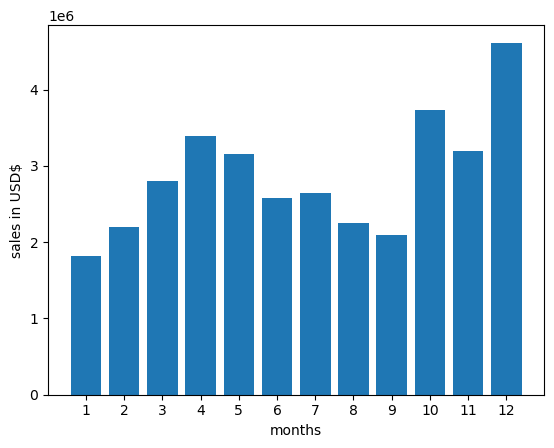

In [123]:
import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months, results)
plt.xticks(months)
plt.ylabel('sales in USD$')
plt.xlabel('months')
plt.show()

# Task 2: what city sold the most

### add a city column

In [148]:
#use apply method from pandas
def get_city(address):
    return address.split(',')[1]
def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + '(' + get_state(x) + ')')
all_data.head()
    

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101",6,11.95,Portland(ME)
1,209922,Macbook Pro Laptop,1,1700.00,06/30/19 10:05,"80 4th St, San Francisco, CA 94016",6,1700.00,San Francisco(CA)
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001",6,999.99,Los Angeles(CA)
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101",6,149.99,Seattle(WA)
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016",6,99.99,San Francisco(CA)


In [156]:
results = all_data.groupby('City').sum()['Sales']
results

/var/folders/vc/3fbsdlsd04b7nplvx9m1rhcw0000gn/T/ipykernel_5060/2713997451.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = all_data.groupby('City').sum()['Sales']


City
 Atlanta(GA)          2795498.58
 Austin(TX)           1819581.75
 Boston(MA)           3661642.01
 Dallas(TX)           2767975.40
 Los Angeles(CA)      5452570.80
 New York City(NY)    4664317.43
 Portland(ME)          449758.27
 Portland(OR)         1870732.34
 San Francisco(CA)    8262203.91
 Seattle(WA)          2747755.48
Name: Sales, dtype: float64

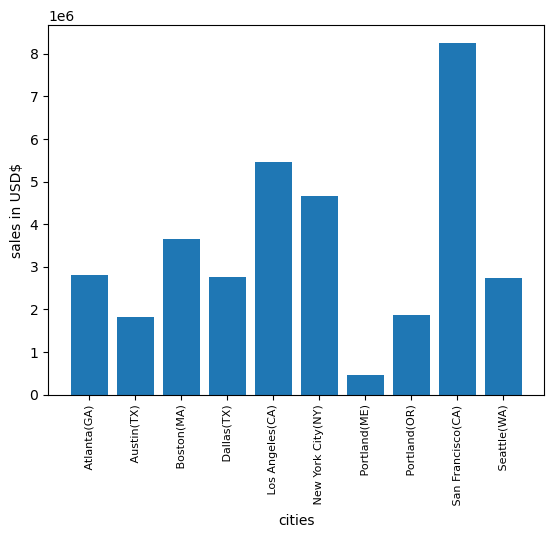

In [161]:
import matplotlib.pyplot as plt

cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities, results)
plt.xticks(cities, rotation = 'vertical', size=8)
plt.ylabel('sales in USD$')
plt.xlabel('cities')
plt.show()